# Introduction to UMAP

In [122]:
import numpy as np
import pandas as pd

import umap
from sklearn.datasets import load_digits

digits = load_digits(6)
X = digits.data
y = digits.target
embedding = umap.UMAP(n_neighbors=15,
                      min_dist=0.3,
#                      metric='correlation').fit_transform(X)
#                      metric='minkowski').fit_transform(X)
                      metric='euclidean').fit_transform(X)


## How to plot UMAP embeddings

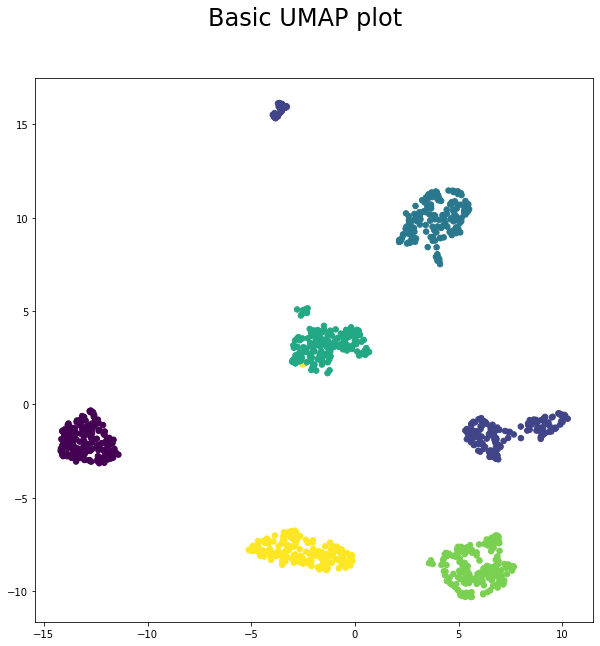

In [123]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
plt.suptitle("Basic UMAP plot",size=24)

ax = fig.add_subplot(111)
ax.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, s=30)

plt.show()

## Advanced plotting

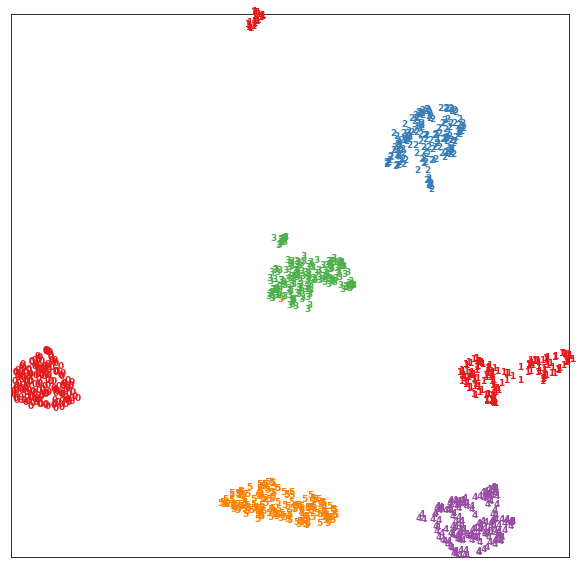

In [124]:
# Scale and visualize the embedding vectors
def plot_umap(X, title=None,subplot=111):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(subplot)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


# Plot the embedding
plot_umap(embedding)

## Important parameters

* n_neighbors (default: 15) - the number of neighbors determines the local versus global scale
* min_dist (default: 0.1) - the minimum distance points are allowed to have in the low-dim representation
* metric (default: euclidean) - how the distance is measured
* n_components (default: 2) - the target dimension for the low-dim representation

# Practical Task UMAP I

Semi-supervised Learning with UMAP

* Mask some parts of the data (mask the labels)
* Experiment with the number of masked points (total number of points is 1080 for 6 digit classes)

This can be used for automatically labelling unlabeled data points using the labels from a known sample.

In [125]:
number_of_masked_points = 10

masked_y = y.copy().astype(np.int8)
masked_y[np.random.choice(number_of_masked_points,size=number_of_masked_points,replace=False)] = 7
pd.Series(masked_y).value_counts()

5    181
3    181
4    180
1    180
0    176
2    175
7     10
dtype: int64

In [129]:
fitter = umap.UMAP(min_dist=0.3,).fit(X, y=masked_y)
embedding_semi = fitter.embedding_

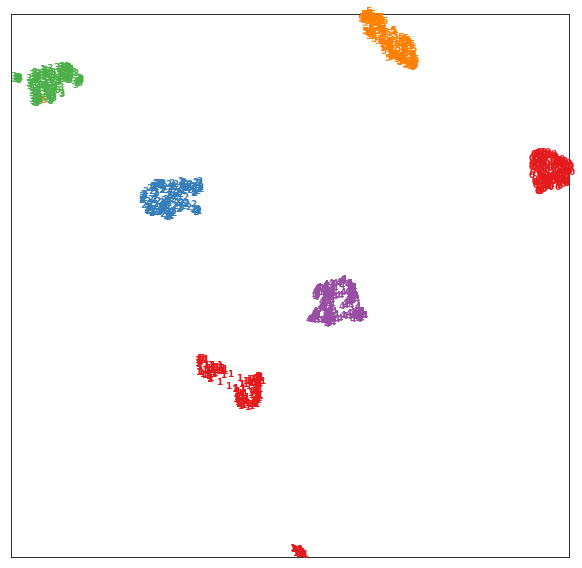

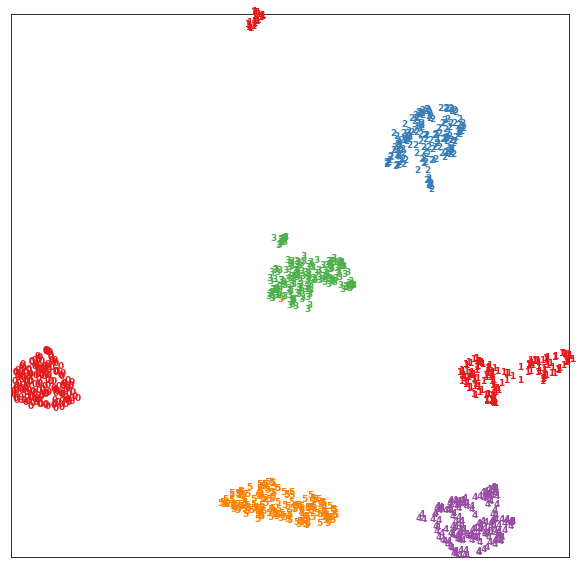

In [130]:
plot_umap(embedding_semi)
plot_umap(embedding)

# Practical Task UMAP II - Advanced

Metric Learning with UMAP

* Follow the instruction from

https://umap-learn.readthedocs.io/en/latest/supervised.html#training-with-labels-and-embedding-unlabelled-test-data-metric-learning-with-umap


